In [1]:
import MEArec as mr # what we will use to create a synthetic recording
import spikeinterface.full as si  # what we will use to sort the spikes
import matplotlib.pyplot as plt # for plots 
import math # for calculating 
import numpy as np
import pandas as pd

In [2]:
cell_folder = "C:\\Users\\melin\\Anaconda3\\envs\\si_env\\Lib\\site-packages\\MEArec\\cell_models\\bbp" # folder where we downloaded some cell models (13)
working_folder = "C:\\Users\\melin\\Desktop\\COURS_M2_CNN\\Projet\\" # the current folder 
param_folder = working_folder + 'params_no_drift\\' # where we put they yaml files with all the parameters
files_folder = working_folder + 'temporary_files_no_drift\\' # where we want to put the created files 
param_ext = '.yml' # yaml files contain dictionaries for our parameters 
files_ext = ".h5" # h5 files are created to save what we do 
parallel_compute = 4 # number of parallel processing that will be ongoing for heavy process 

Here, we generate templates with parameters defined in a yaml file:
- what probe we wante to use
- the min/max locations of each neuron
- the number of templates for each cell model 
- the drift, if drift = True, we will have multiple templates for each cell at multiple drift steps 

In [3]:

tempgen = mr.gen_templates(cell_models_folder=cell_folder, params=f"{param_folder}templates{param_ext}", n_jobs=parallel_compute)

# Then we save the generated template in the output folder put in 'filename'
mr.save_template_generator(tempgen, filename=f"{files_folder}templates{files_ext}", verbose = False)


Running with 4 jobs
Aggregating templates



Simulation time: 108.29850125312805





c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes, np.bool_)):
c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(ite

We create some spike trains (for a chosen number of excitatory/inhibitory neurons and their firing rates) for a specified duration 
Then based on the templates and the spike trains generated, we can create a recording with again different parameters (noise, constraints on the templates, drift...)

In [4]:
spgen = mr.gen_spiketrains(params=f"{param_folder}spiketrains{param_ext}")

recgen = mr.gen_recordings(params=f"{param_folder}recordings{param_ext}", spgen = spgen, tempgen=tempgen, n_jobs=parallel_compute)

# We also save the recording 
mr.save_recording_generator(recgen, filename=f"{files_folder}recordings{files_ext}")


c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated; use 'StationaryPoissonProcess'.
  warnings.warn(
c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\elephant\spike_train_generation.py:1118: DeprecationWarning: 'homogeneous_poisson_process' is deprecated;

dtype float32
Noise Level  10
Templates selection seed:  1
Selecting cells
Padding template edges
Elapsed pad time: 0.9902088642120361
Creating time jittering
Elapsed jitter time: 0.42962026596069336
Smoothing templates
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  1
Electrode modulaton
Adding noise
Noise seed:  1
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  17.0017445


c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(item, (int, float, np.integer, np.float, str, bytes, np.bool_)):
c:\Users\melin\Anaconda3\envs\si_env\lib\site-packages\MEArec\tools.py:649: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(ite

We read the different parameters files to extract relevant information, as the probe used, the number of neurons, the duration of the recording, or if there is a drift

In [5]:
import yaml

# We read the yaml file for the templates and extract information about the probe 
with open("C:\\Users\\melin\\Desktop\\COURS_M2_CNN\\Projet\\params_no_drift\\templates.yml") as file:
    try:
        data = yaml.safe_load(file)
        probe_type = data['probe']
    except yaml.YAMLError as exception:
        print(exception)

# We read the yaml file for the spiketrains and extract information about the number of neurons and the duration 
with open("C:\\Users\\melin\\Desktop\\COURS_M2_CNN\\Projet\\params_no_drift\\spiketrains.yml") as file:
    try:
        data = yaml.safe_load(file)
        number_neurons = data['n_exc'] + data['n_inh']
        duration = data['duration']
    except yaml.YAMLError as exception:
        print(exception)

# We read the yaml file for the recordings and extract information about the drift
with open("C:\\Users\\melin\\Desktop\\COURS_M2_CNN\\Projet\\params_no_drift\\recordings.yml") as file:
    try:
        data = yaml.safe_load(file)
        if data['drifting'] :
            drift = True  
            start = data['t_start_drift']
        else :
            drift = False 
    except yaml.YAMLError as exception:
        print(exception)

# We print the relevant information 
print(f"We created a recording with {number_neurons} neurons, lasting {duration} seconds, from a {probe_type} probe")
if drift : 
    print(f"The drift starts after {start} seconds")

We created a recording with 30 neurons, lasting 30 seconds, from a Neuronexus-32 probe


From all the generated templates, some were randomly chosen to create our recording, we recover their identification numbers here

In [6]:
template_ids = recgen.template_ids
n_templates = len(template_ids)

Now that the recording is ready, we open it with spike interface

In [7]:
recording_si, sorting_si = si.read_mearec(f"{files_folder}recordings{files_ext}")

Using the monopolar triangulation method, spike interface estimates the position of the different units 

In [8]:
locations = {}
for id in range (n_templates) :
    sorting_id = sorting_si.select_units([f"#{id}"]) # we create a sorting with only one unit 
    # Then we extract the waveforms corresponding to this unit 
    wv_id = si.extract_waveforms(recording = recording_si, sorting= sorting_id, overwrite= False, folder=f"{files_folder}//wv_{id}", load_if_exists=True, max_spikes_per_unit=None)
    locations[f"#{id}"] = si.compute_spike_locations(wv_id, method = 'monopolar_triangulation') # finally there is the localization of each extracted waveform

Then, we compare the real position of each unit (large dots) from MEArec with  all the predictions (small dots) made by spike interface.

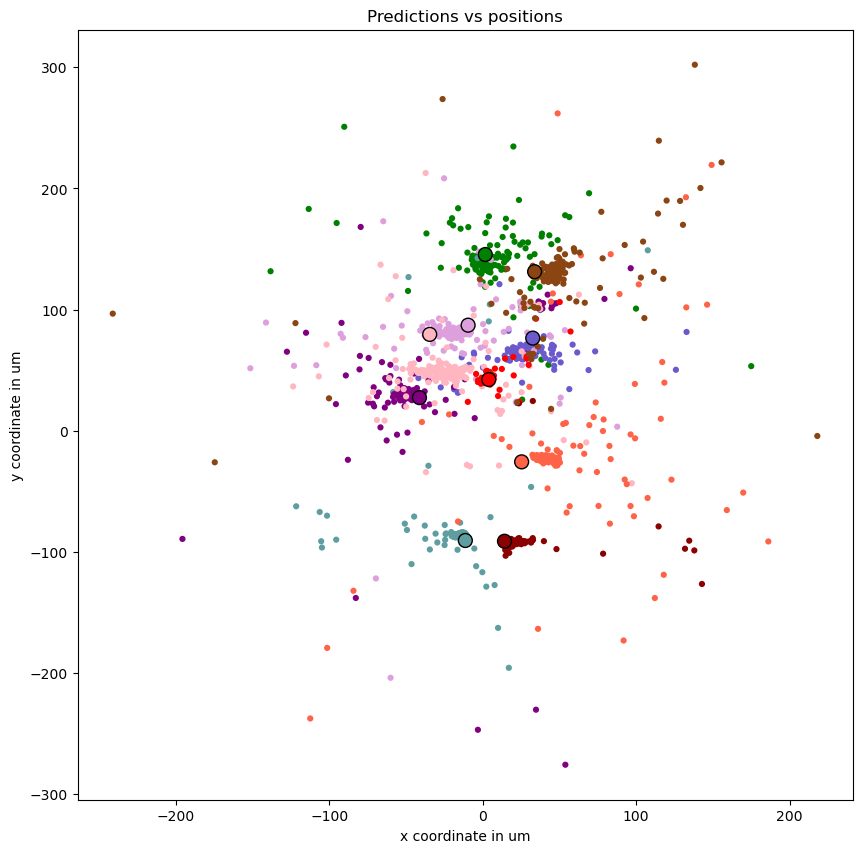

In [9]:
colors = ['green', 'cadetblue', 'slateblue', 'purple', 'plum', 'lightpink', 'tomato', 'red', 'darkred', 'saddlebrown']
fig = plt.figure(figsize =(10, 10))

errors = [0]*n_templates
dot_refs_x = [0]*n_templates
dot_refs_y = [0]*n_templates

for id in range (n_templates) :

    dot_refs_x[id] = tempgen.locations[template_ids[id]][1] # This is the 'real' position of the unit from mearec 
    dot_refs_y[id] = tempgen.locations[template_ids[id]][2]
    
    x = []
    y = []
    errors[id] = [0]*len(locations[f"#{id}"])

    for t in range (len(locations[f"#{id}"])) :
        dot_pred = locations[f"#{id}"][t][0], locations[f"#{id}"][t][1] # this is the prediction made by spike interface 
        x.append(dot_pred[0])
        y.append(dot_pred[1])   
        errors[id][t] = math.dist(dot_pred, (dot_refs_x[id], dot_refs_y[id])) # We compute the distance between the real position and the prediction (norm 2)

    if id < 10 : # We only show a maximum of 10 units so the plot is easier to read 
        plt.scatter(x, y, s = 20, edgecolors= 'none', color = colors[id]) # the predictions are represented by small dots 

n_plot = min(n_templates, 10)
# the real positions are represented by larger dots circled in black
plt.scatter(dot_refs_x[:n_plot], dot_refs_y[:n_plot], s=100, color = colors[:n_plot], edgecolors= 'black')  
plt.title('Predictions vs positions')
plt.xlabel('x coordinate in um')
plt.ylabel('y coordinate in um')
plt.show()

We can see qualitatively on the above plot that the predictions are not always around the real position. We computed in the precedent loop the distances between the predictions and the reality. We can now plot them to evaluate quantitavely the precision of the monopolar triangulation method. 

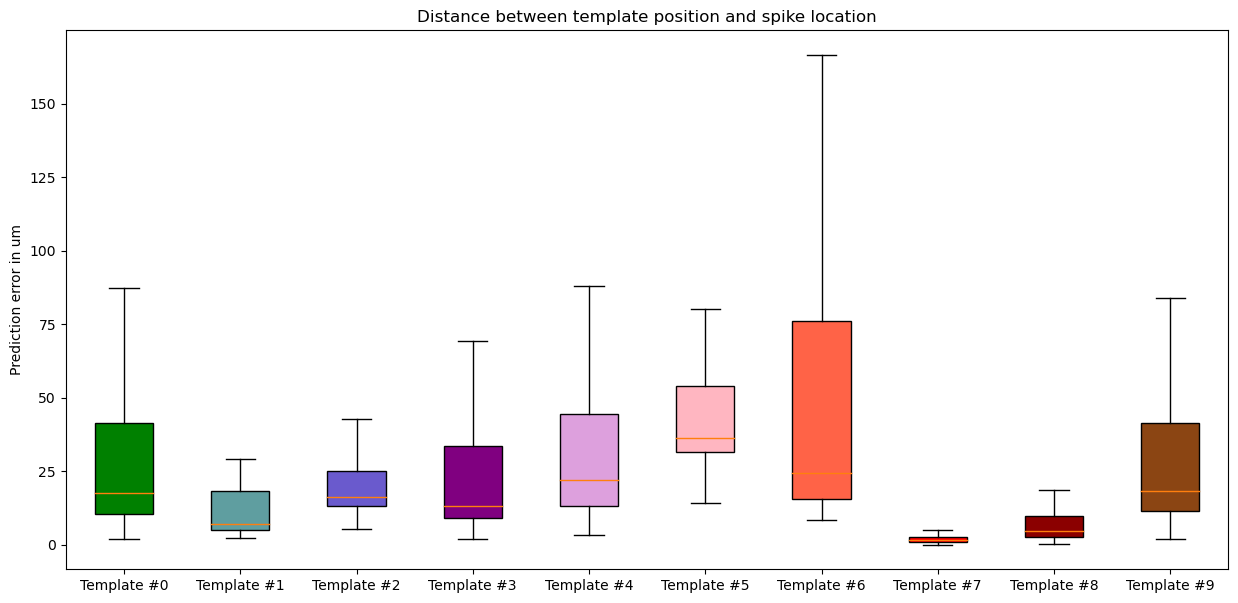

In [10]:
fig = plt.figure(figsize =(15, 7))
ax = plt.subplot()
bp = plt.boxplot(errors[:n_plot], 0, '', patch_artist=True)
ax.set_xticklabels([f"Template #{i}" for i in range (n_plot)]) # We only show a maximum of 10 boxplots for readibility
ax.set_ylabel('Prediction error in um')
ax.set_title('Distance between template position and spike location')

for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

The location error varies greatly between the different templates, we will now try to understand why. We can test the correlation between the error and different features: 
- the variation of the peak to peak ratios betweeen the different probes for each template
- the frobenius norm of each template matrix 

In [12]:
peak_to_peak_var = [0]*n_templates
mean_errors = [0]*n_templates
frob_norms = [0]*n_templates

for i, template_id in enumerate(template_ids) :
    peak_to_peak = [0]*32
    for probe in range (32) :
        peak_to_peak[probe] = np.max(tempgen.templates[template_id][probe][:]) - np.min(tempgen.templates[template_id][probe][:])
    peak_to_peak_var[i] = np.var(peak_to_peak)
    frob_norms[i] = np.linalg.norm(tempgen.templates[template_id])
    mean_errors[i] = np.mean(errors[i])

print(f"The peak to peak ratios variability are correlated at {np.corrcoef(mean_errors, peak_to_peak_var)[0][1]} with the error")
print(f"The Frobenius norms are correlated at {np.corrcoef(mean_errors, frob_norms)[0][1]} with the error")


The peak to peak ratios variability are correlated at -0.4183513418678792 with the error
The Frobenius norms are correlated at -0.5682645167158018 with the error
